# Recognition of human faces with CNN model Excercise 2 Report


Data taken Extended Yale face database B (cropped)
http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html



38 different persons, each photographed in several conditions:
    Intensity of illumination
    Position of light source
    But only one pose, unlike in the original non-cropped database
There are also some non-cropped images
    You are allowed to ignore them
    
    
Tasks:  
 1. Create a CNN model with the following architecture: 
 
           Conv layer 1:
           - Filter size = 5 - Number of filters = 16 
           - Activation function = relu Pooling layer 1: 
           - max pooling = 2            
           Conv layer 2: 
           - Filter size = 5 
           - Number of filters = 36 
           - Activation function = relu Pooling layer 2: 
           - max pooling = 2            
           Fully connected layer 1: 
           - Number of neurons: 512 
           - Activation function = relu            
           Fully connected layer 2: 
           - Number of neurons: number_Of_Classes 
           - Activation function = softmax 
      Regularisation: dropout (prob = 0.5) 
 2. Train the model on 80% of data for training and 20% of data for test and display a plot of the loss function and accuracy
 3. Evaluate the model on the test data and report the overall classification accuracy and the confusion matrix 
 4. Make predictions on some image from test dataset by using the trained model and display the predicted class and class probability on the image 


## Introduction

In this exercise we use Yele face dataset to investigate human face recognition. The image data can be found from http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html. The data set contains images of 38 different persons. Each person is photographed in several conditions such as intensity of illumination, position of light etc. We used the cropped version of the dataset and ignored the uncropped images. The images are cropped and resized 168x192. There are about 57 different conditions for each person if we ignore the uncropped images. Therefor we will have 2166 different rows in this dataset and 168x192 = 32256 features (pixels). Each image is represented with 32256 features. PCA (eigen faces) is used as dimension reduction method. Using PCA the pixel value is then reduced from 168x192 to 28x32. 
The goal of this exercise is:
    •	Use one of the deep learning models, Convolution Neural Network(CNN) for image classification with the given                     architecture.
    •	Divide the data to training and testing data with 80 % and 20% respectively and train the data and display loss                 function and accuracy.
    •	And finally report the classification accuracy, confusion matrix and make prediction on some images from the testing set         and display the predicted class and the class probability on the images
In this exercise, Keras which is high-level neural network API written in Python which runs on top of TensorFlow used. 



### Import all the required libraries

In [1]:
from collections import OrderedDict
import os
import numpy as np
import pandas as pd
from orderedset import OrderedSet
import imageio
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder

import os
os.getcwd()#check the working dir


'C:\\Users\\Ashenafi\\Desktop\\ML&PR'

Some of the pre-processing step is skipped in this exercise. The data is converted to pandas data frame in exercise one. Let us start by importing the data frame coverted in excercise 1.


In [4]:
result_2 = pd.read_csv(r"C:\Users\Ashenafi\Desktop\ML&PR\yeleimages.csv")

In [5]:
result_2.head()

,person,pic_name,0,1,2,3,4,5,6,7,...,32246,32247,32248,32249,32250,32251,32252,32253,32254,32255
0,yaleB01,P00A-130E+20,0.023529,0.027451,0.031373,0.031373,0.023529,0.023529,0.023529,0.027451,...,0.211765,0.321569,0.309804,0.156863,0.172549,0.211765,0.184314,0.298039,0.372549,0.458824
1,yaleB02,P00A-130E+20,0.023529,0.023529,0.023529,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.058824,0.058824,0.062745,0.058824,0.058824,0.062745,0.066667,0.070588,0.074510,0.078431
2,yaleB03,P00A-130E+20,0.027451,0.027451,0.031373,0.027451,0.027451,0.027451,0.027451,0.031373,...,0.125490,0.160784,0.149020,0.160784,0.207843,0.266667,0.317647,0.313725,0.282353,0.278431
3,yaleB04,P00A-130E+20,0.023529,0.023529,0.023529,0.015686,0.015686,0.019608,0.015686,0.015686,...,0.215686,0.207843,0.168627,0.188235,0.211765,0.235294,0.282353,0.227451,0.250980,0.274510
4,yaleB05,P00A-130E+20,0.000000,0.000000,0.000000,0.003922,0.000000,0.003922,0.003922,0.000000,...,0.741176,0.533333,0.364706,0.407843,0.403922,0.435294,0.494118,0.588235,0.639216,0.674510


#### Assign the person as class and the rest as features


let us ignore the pic_name col for now, since we are intersted on person's lable. 

In [6]:
df_class= result_2.loc[:,'person' ] 
df_features= result_2.iloc[:, 2: ]

In [7]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,32246,32247,32248,32249,32250,32251,32252,32253,32254,32255
0,0.023529,0.027451,0.031373,0.031373,0.023529,0.023529,0.023529,0.027451,0.023529,0.027451,...,0.211765,0.321569,0.309804,0.156863,0.172549,0.211765,0.184314,0.298039,0.372549,0.458824
1,0.023529,0.023529,0.023529,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.058824,0.058824,0.062745,0.058824,0.058824,0.062745,0.066667,0.070588,0.074510,0.078431
2,0.027451,0.027451,0.031373,0.027451,0.027451,0.027451,0.027451,0.031373,0.027451,0.027451,...,0.125490,0.160784,0.149020,0.160784,0.207843,0.266667,0.317647,0.313725,0.282353,0.278431
3,0.023529,0.023529,0.023529,0.015686,0.015686,0.019608,0.015686,0.015686,0.015686,0.019608,...,0.215686,0.207843,0.168627,0.188235,0.211765,0.235294,0.282353,0.227451,0.250980,0.274510
4,0.000000,0.000000,0.000000,0.003922,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.741176,0.533333,0.364706,0.407843,0.403922,0.435294,0.494118,0.588235,0.639216,0.674510


In [8]:
df_class.head()

0    yaleB01
1    yaleB02
2    yaleB03
3    yaleB04
4    yaleB05
Name: person, dtype: object

In [9]:
df_class.shape, df_features.shape

((2166,), (2166, 32256))

### Feature extraction and preprocessing


### PCA (eigenfaces)

PCA is used as feature extraction method, According to PCA 95% of the variance is on 5-10% the dimension.

In [11]:
# According to PCA 95% of the variance is on 5-10% the diamension
from sklearn.decomposition import PCA
pca = PCA(n_components=896) # for memory perpuse i took a resonable n_componets = 896(168/6 * 192/6)
pca.fit(df_features)
pca_30 = pca.transform(df_features)
pca_30.shape

(2166, 896)

In [13]:
#we can verify the variance of each PC..as we can see the first PC =36%, second = 34% ....
import numpy as np
from sklearn.decomposition import PCA
print(pca.explained_variance_ratio_)

[  3.62699172e-01   3.48764423e-01   4.87821421e-02   2.78514982e-02
   1.49207716e-02   1.38279486e-02   1.03208609e-02   9.63410931e-03
   7.58212759e-03   6.91921831e-03   6.66255202e-03   5.22520991e-03
   4.91186228e-03   4.56133142e-03   4.05668679e-03   3.94759990e-03
   3.47155168e-03   3.40182931e-03   3.19698575e-03   3.12376411e-03
   2.85221781e-03   2.61164725e-03   2.46904926e-03   2.35439107e-03
   2.22879099e-03   2.10917139e-03   2.04319849e-03   1.98979877e-03
   1.89495316e-03   1.74491729e-03   1.68664151e-03   1.62960120e-03
   1.59057990e-03   1.52217174e-03   1.47603364e-03   1.43585707e-03
   1.40171583e-03   1.36395528e-03   1.30006728e-03   1.25296142e-03
   1.23899094e-03   1.18396698e-03   1.11652341e-03   1.07381901e-03
   1.03280074e-03   9.94230284e-04   9.71684106e-04   9.48966782e-04
   9.17964318e-04   8.87756008e-04   8.71854368e-04   8.54993727e-04
   8.33878435e-04   8.10827098e-04   7.93156472e-04   7.78419541e-04
   7.39102867e-04   6.99087080e-04

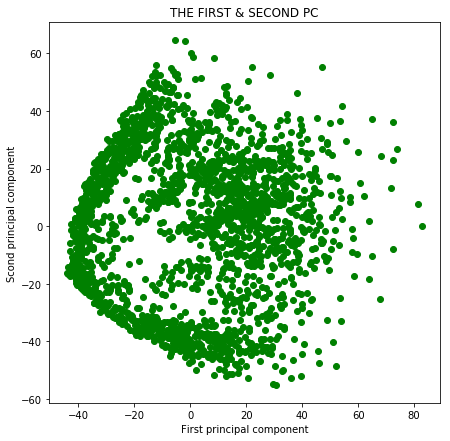

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,7))
plt.scatter(pca_30[:,0], pca_30[:,1],color='green', label="green")
# axis.plot(pca_30[:,0], pca_30[:,1], linewidth=0.7, color='black')
# axis.plot(pca_30[:,0], pca_30[:,1], linewidth=0.7, color='blue')
plt.xlabel('First principal component')
plt.ylabel('Scond principal component')
plt.title('THE FIRST & SECOND PC')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pca_30, df_class,test_size=0.25, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1624, 896), (542, 896), (1624,), (542,))

Now we have to change all to numpy array, and make the dimensions ready for Keras requirments. Image data is represented as a 3-dimensional matrix of width * height * channels.

In [14]:
# features to an array
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [15]:
Xtrain= X_train_arr.reshape((X_train_arr.shape[0],28, 32,1)).astype('float64')

In [16]:
Xtest= X_test_arr.reshape((X_test_arr.shape[0],28, 32,1)).astype('float64')

In [17]:
Xtrain.shape, Xtest.shape

((1624, 28, 32, 1), (542, 28, 32, 1))

In [18]:
ytrain= pd.get_dummies(y_train_arr).as_matrix()
ytest= pd.get_dummies(y_test_arr).as_matrix()

In [19]:
ytrain.shape, ytest.shape

((1624, 38), (542, 38))

In [20]:
type(Xtrain),type(ytrain), type(Xtest), type(ytest)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Import all the necessary libraries of Keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv2D, GlobalAveragePooling1D, MaxPooling2D,Flatten
from keras import optimizers

Using TensorFlow backend.


### TASK 1: Create a CNN model with the given architecture

In [63]:
model = Sequential()
# 16 filter and each filter get input from 5x5 pixels at a time.Dragging the 5×5 receptive field across the input image data 
#with a stride width of 1 will result in a feature map of 28×32 output. 16 filters means 16 diffrent 28x32 feature mapps will be
#created for one image. Therefore we have (5x5+1)x 16x28x32 = 372,736 connection in our convolutional layer
model.add(Conv2D(16, (5, 5), input_shape=(28, 32,1), activation='relu'))
#Maxpooling of width 2 and hight 2 the 16 diffrent 28x32 feature maps to 14x16 feature maps of output
model.add(MaxPooling2D(pool_size=(2, 2)))
#Another layer with diffrent filter size
model.add(Conv2D(32, (5, 5), activation='relu'))
#Another maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten changes the given input to a desired dimension shape, we can now use the Dense fun
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#Dropout helps to avoid overfitting
model.add(Dropout(0.5))
#finally softmax is used on the last layer for classification
model.add(Dense(38, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 10, 32)         12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               328192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

### TASK 2: Train the model  and display with a plot the loss function and accuracy.

In [24]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history= model.fit(Xtrain, ytrain,validation_split=0.2, epochs=150, batch_size=200, verbose=0)

In [181]:
# model.fit(Xtrain, ytrain,validation_split=0.2, epochs=5, batch_size=200, verbose=0)

In [26]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [29]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

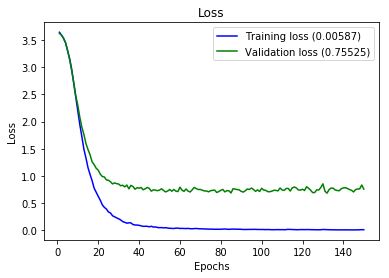

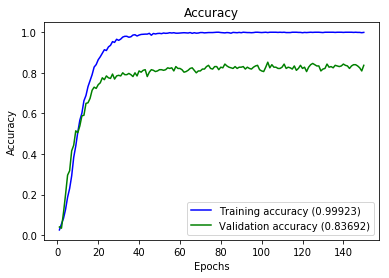

In [30]:
plot_history(history)

###  TASK 3: Evaluate the data with the test data 

In [48]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [49]:

print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 81.18%


Y_pred_2p is the predicted probability values for each person. As the probability value approaches one, it tells us the predicted person’s class. For that reason, we can assume and change the probability of each person to binary. If the probability is greater than 0.5, we label the class ‘1’, otherwise 0. We can see that in y_pred_23.

In [58]:
from sklearn.metrics import confusion_matrix
y_pred_2p = model.predict(Xtest) # this gives the probablities array
y_pred_23 = np.where( y_pred_2p>0.5, 1, 0) # change to 1  if probality is greater than 0.5 otherwise 0
confusion_matrix_23 = confusion_matrix(ytest.argmax(axis=1), y_pred_23.argmax(axis=1))
print(confusion_matrix_23)


[[12  0  0 ...,  0  1  0]
 [ 2 12  0 ...,  0  0  0]
 [ 0  0  9 ...,  0  0  0]
 ..., 
 [ 2  0  0 ..., 11  0  0]
 [ 4  0  0 ...,  0  7  0]
 [ 0  0  0 ...,  0  0 16]]


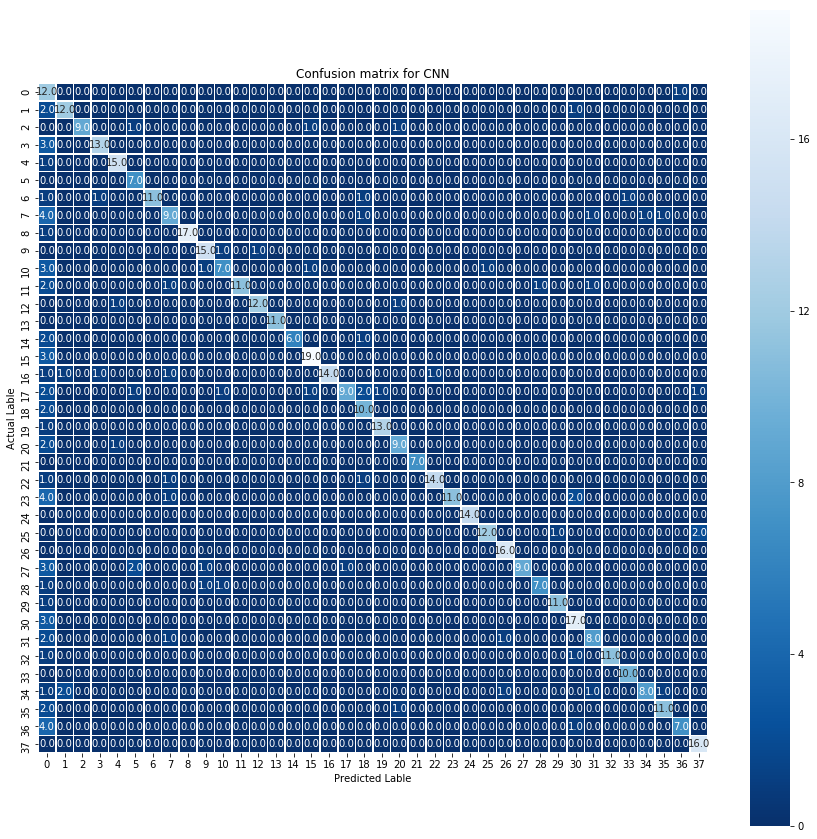

In [65]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix_23, annot= True, fmt = ".1f", linewidths= .5, square=True, cmap= 'Blues_r')
plt.ylabel('Actual Lable')
plt.xlabel('Predicted Lable')
plt.title('Confusion matrix for CNN')

### TASK 4: Make predictions on some image from test dataset by using the trained model and display the predicted class and class probability on the image

In [60]:
# Predicted probablity values for the first two rows(images)
# Only two is taken for a space perpose and those two values for the problity are enogh to make the point
y_pred_2p[:2] 

array([[  2.98971087e-01,   1.92792583e-02,   3.76153775e-02,
          2.18007535e-05,   4.00452577e-02,   4.38215137e-01,
          1.46487482e-05,   8.81128799e-05,   1.08177619e-05,
          4.97344090e-03,   3.30373528e-03,   2.05578144e-05,
          3.89799685e-03,   1.64480787e-03,   1.63963952e-04,
          1.92255818e-03,   1.45883691e-02,   4.11750574e-04,
          7.90544879e-03,   9.49060603e-04,   1.16768679e-04,
          7.19761185e-04,   3.91225144e-02,   1.45801634e-03,
          4.30718617e-04,   1.51636070e-02,   1.53190987e-02,
          8.09207279e-03,   2.88023497e-04,   1.31197812e-04,
          5.19987755e-03,   4.47206851e-03,   5.90797617e-06,
          2.82649489e-05,   2.12406111e-03,   1.47469481e-02,
          1.85048673e-02,   3.28142523e-05],
       [  6.31045987e-05,   1.42082467e-06,   8.64704077e-08,
          2.20547580e-08,   1.40561269e-08,   7.87228237e-06,
          1.34107547e-09,   1.73589428e-13,   3.20800886e-10,
          4.99628028e-09,

In [61]:
# Predicted probablity values chaged to binary values(1 for problablity value greater than 0.5, 0 other wise)
# for the first 5 value
y_pred_23[:5] 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [62]:
# The class values for the first 5 values of the testing set 
ytest[0:5]  

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Observations

From the above three outputs we can see the following points.
y_pred_2p – shown only two rows, the first-row highest value highlighted which is less than 0.5. where as the second-row highest value is very close to 1.

y_pred_23- Which is the predicted class equivalent to y_pred_2p but converted to binary (encoded in a way that if probability of predicted class greater than 0.5 then to value ‘ 1‘, otherwise ‘0’ ). I took the first 5 rows for demo purpose. We can see during this conversion the first row is all ‘0’ since none of the values of the probabilities are greater than 0.5. Where as the second row has one value which is greater than 0.5, and so on.

ytest-the true class of the image. 

Now we have to compare the value of y_pred_23 and ytest to be able to check if the images are classified correctly or not. From the taken 5 example images except the first one all the others are classified correctly.


Conculusion

CNN classifies our image data with an accuracy of 81.18% with current architecture. This accuracy is achieved by tuning some of the hyperparameters. Further experimenting might improve the accuracy level. Some of the recommended changes are more data, bigger models (wider or/and deeper models).
